<a href="https://colab.research.google.com/github/minhbao1705/AIO-2023/blob/main/M02W03_F_4.1_Advertising_Stochastic_DataScaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

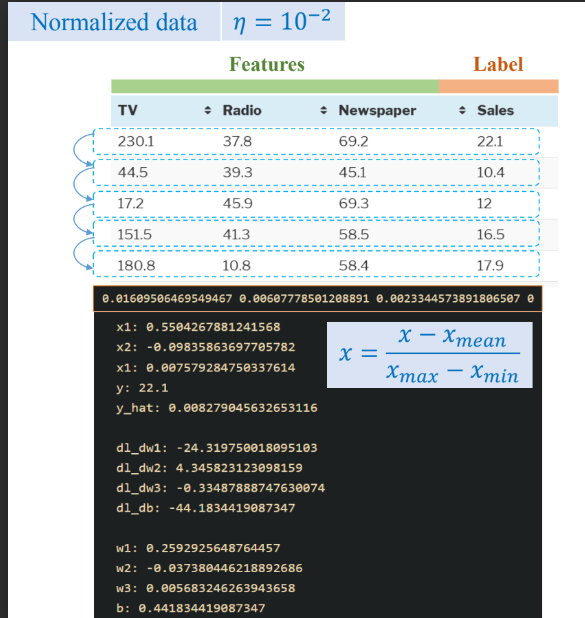

### Data scaling

In [ ]:
def scaling(data1, data2, data3):
  data = data1 + data2 + data3

  max_value = max(data)
  min_value = min(data)
  mean_value = sum(data) / len(data)

  data1 = [(x - mean_value) / (max_value - min_value) for x in data1]
  data2 = [(x - mean_value) / (max_value - min_value) for x in data2]
  data3 = [(x - mean_value) / (max_value - min_value) for x in data3]

  return (data1, data2, data3), (mean_value, max_value, min_value)

In [ ]:
data1 = [1, 7, 5, 3]
data2 = [6, 2, 7, 4]
data3 = [7, 2, 4, 5]

(data1, data2, data3), (mean_value, max_value, min_value) = scaling(data1, data2, data3)
print(data1, data2, data3)
print(mean_value, max_value, min_value)

[-0.5694444444444445, 0.4305555555555555, 0.09722222222222217, -0.23611111111111116] [0.26388888888888884, -0.40277777777777785, 0.4305555555555555, -0.06944444444444449] [0.4305555555555555, -0.40277777777777785, -0.06944444444444449, 0.09722222222222217]
4.416666666666667 7 1


In [ ]:
import numpy as np

def get_column(data, index):
  result = [row[index] for row in data]
  return result

def scaling (data1, data2, data3):
  data = data1 + data2 + data3

  max_value = max(data)
  min_value = min(data)
  mean_value = sum(data) / len(data)

  data1 = [(x - mean_value) / (max_value - min_value) for x in data1]
  data2 = [(x - mean_value) / (max_value - min_value) for x in data2]
  data3 = [(x - mean_value) / (max_value - min_value) for x in data3]

  return (data1, data2, data3), (mean_value, max_value, min_value)

data = np.genfromtxt('/content/drive/MyDrive/advertising.csv', delimiter=',', skip_header=1).tolist()
tv_data = get_column(data, 0)
radio_data = get_column(data, 1)
newspaper_data = get_column(data, 2)
sales_data = get_column(data, 3)

(tv_data, radio_data, newspaper_data), (mean_v, max_v, min_v) = scaling(tv_data,
                                                                    radio_data,
                                                                    newspaper_data)

print(tv_data[:5])
print(radio_data[:5])
print(newspaper_data[:5])
print(sales_data[:5])
print(max_v, min_v, mean_v)

[0.5504267881241568, -0.07575404858299574, -0.16785931174089047, 0.285244601889339, 0.3840975033738194]
[-0.09835863697705782, -0.09329790823211856, -0.07103070175438575, -0.08655026990553286, -0.1894517543859647]
[0.007579284750337614, -0.07372975708502003, 0.007916666666666879, -0.028520580296895866, -0.028857962213225157]
[22.1, 10.4, 12.0, 16.5, 17.9]
296.4 0.0 66.95349999999993


### implementation

In [ ]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

def get_column(data, index):
  result = [row[index] for row in data]
  return result

def scaling(data1, data2, data3):
  data = data1 + data2 + data3

  max_value = max(data)
  min_value = min(data)
  mean_value = sum(data) / len(data)

  data1 = [(x - mean_value) / (max_value - min_value) for x in data1]
  data2 = [(x - mean_value) / (max_value - min_value) for x in data2]
  data3 = [(x - mean_value) / (max_value - min_value) for x in data3]

  return (data1, data2, data3), (mean_value, max_value, min_value)

data = np.genfromtxt('/content/drive/MyDrive/advertising.csv', delimiter=',', skip_header=1).tolist()
N = len(data)

# get tv (index=0)
tv_data = get_column(data, 0)
print(tv_data[:5])

# get radio (index=1)
radio_data = get_column(data, 1)
print(radio_data[:5])

# get newspaper (index=2)
newspaper_data = get_column(data, 2)
print(newspaper_data[:5])

# get sales (index=0)
sales_data = get_column(data, 3)
print(sales_data[:5])

[230.1, 44.5, 17.2, 151.5, 180.8]
[37.8, 39.3, 45.9, 41.3, 10.8]
[69.2, 45.1, 69.3, 58.5, 58.4]
[22.1, 10.4, 12.0, 16.5, 17.9]


In [ ]:
# scale data (only for features)
# remenber to scale input features in inference, therefore, we need to save max, min and mean values

(tv_data, radio_data, newspaper_data), (mean_v, max_v, min_v) = scaling(tv_data,
                                                                        radio_data,
                                                                        newspaper_data)

print(tv_data[:5])
print(radio_data[:5])
print(newspaper_data[:5])
print(mean_v, max_v, min_v)

[0.5504267881241568, -0.07575404858299574, -0.16785931174089047, 0.285244601889339, 0.3840975033738194]
[-0.09835863697705782, -0.09329790823211856, -0.07103070175438575, -0.08655026990553286, -0.1894517543859647]
[0.007579284750337614, -0.07372975708502003, 0.007916666666666879, -0.028520580296895866, -0.028857962213225157]
66.95349999999993 296.4 0.0


In [ ]:
# compute output and loss
def predict(x1, x2, x3, w1, w2, w3, b):
  return w1*x1 + w2*x2 + w3*x3 + b

def compute_loss(y_hat, y):
  return (y_hat - y)**2

# compute gradient
def compute_gradient_wi(xi, y, y_hat):
  dl_dwi = 2*xi*(y_hat - y)
  return dl_dwi

def compute_gradient_b(y, y_hat):
  dl_db = 2*(y_hat - y)
  return dl_db

# update weights
def update_weight_wi(wi, dl_dwi, lr):
  wi = wi - lr*dl_dwi
  return wi

def update_weight_b(b, dl_db, lr):
  b = b - lr*dl_db
  return b

In [ ]:
def intitialize_params():
  w1 = random.gauss(mu=0.0, sigma=1.0)
  w2 = random.gauss(mu=0.0, sigma=1.0)
  w3 = random.gauss(mu=0.0, sigma=1.0)
  b = 0

  return w1, w2, w3, b

# intitialize model's parameters
w1, w2, w3, b = intitialize_params()
print(w1, w2, w3, b)

-0.6929206790084401 1.7934553365123613 0.4247623575282644 0


In [ ]:
epoch_max = 50
lr = 0.01
losses = []

for epoch in range(epoch_max):
  for i in range(N):
    # get a sample
    x1 = tv_data[i]
    x2 = radio_data[i]
    x3 = newspaper_data[i]
    y = sales_data[i]

    # compute output
    y_hat = predict(x1, x2, x3, w1, w2, w3, b)

    # compute loss
    loss = compute_loss(y, y_hat)

    # compute gradient w1, w2, w3, b
    dl_dw1 = compute_gradient_wi(x1, y, y_hat)
    dl_dw2 = compute_gradient_wi(x2, y, y_hat)
    dl_dw3 = compute_gradient_wi(x3, y, y_hat)
    dl_db = compute_gradient_b(y, y_hat)

    # update parameters
    w1 = update_weight_wi(w1, dl_dw1, lr)
    w2 = update_weight_wi(w2, dl_dw2, lr)
    w3 = update_weight_wi(w3, dl_dw3, lr)
    b = update_weight_b(b, dl_db, lr)

    # logging
    losses.append(loss)

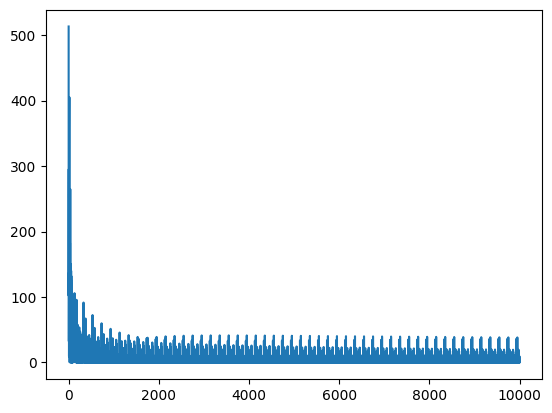

In [ ]:
plt.plot(losses)
plt.show()

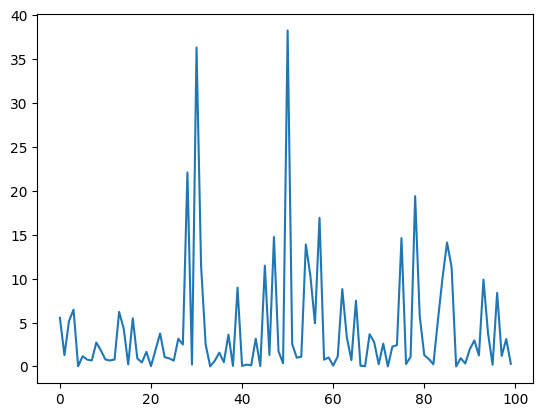

In [ ]:
plt.plot(losses[-100:])
plt.show()

### Inference

In [ ]:
# get model's parameters
print(w1, w2, w3, b)

16.36044149794211 12.025010105856424 3.2701141103382443 12.833109897626967


In [ ]:
# [230.1, 37.8, 69.2, 22.1]

tv = 230.1
radio = 37.8
newspaper = 69.2

x_test = [tv, radio, newspaper]
x_test = [(x - mean_v) / (max_v - min_v) for x in x_test]
tv, radio, newspaper = x_test
print(tv, radio, newspaper)

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is {sales}')

0.5504267881241568 -0.09835863697705782 0.007579284750337614
predicted sales is 20.680356685993377


In [ ]:
def predict(x1, x2, x3, w1, w2, w3, b):
  return w1*x2 + w2*x2 + w3*x3 + b

# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3

x_test = [tv, radio, newspaper]
x_test = [(x - mean_v) / (max_v - min_v) for x in x_test]
tv, radio, newspaper = x_test

sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'Predict sales is {sales}')

Predict sales is 9.686496022442299
